#### Michael Hull
#### Intro to Data Science
#### Midterm Data Project
#### October 16, 2018
____
__ United States data for: __ * US Death Data 1999-2016 *

   __ Data Harvested From: __ [Data.gov](https://catalog.data.gov/dataset/age-adjusted-death-rates-for-the-top-10-leading-causes-of-death-united-states-2013)

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

This is the data for the top ten leading causes of death by year from 1999 to 2016 for each state (and the District of Columbia).

In [159]:
#Putting the data into a dataframe
df = pandas.read_csv('LCOD.csv')
df.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2755,55.5
1,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,439,63.1
2,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4010,54.2
3,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1604,51.8
4,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,California,13213,32.0


In [160]:
df.shape

(10296, 6)

** Issues with the data: **
* The main issue with the file is the format of grouping it is in
* Data supposed to be grouped by cause of death
* First cause was split in half (Accident-Half on top, half on bottom)
* There is also many different ways to go about studying/using the data (By State, by cause, by year)

** Starting with basic info/stats on the data: **
  (Death Rate is per 100,000)

In [161]:
#Dropping redundant/uneeded column
df.drop(['113 Cause Name'], axis = 1, inplace = True)
df.head()

,Year,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2016,Unintentional injuries,Alabama,2755,55.5
1,2016,Unintentional injuries,Alaska,439,63.1
2,2016,Unintentional injuries,Arizona,4010,54.2
3,2016,Unintentional injuries,Arkansas,1604,51.8
4,2016,Unintentional injuries,California,13213,32.0


In [162]:
df.tail()

,Year,Cause Name,State,Deaths,Age-adjusted Death Rate
10291,2003,Unintentional injuries,Wyoming,273,55.1
10292,2002,Unintentional injuries,Wyoming,289,58.1
10293,2001,Unintentional injuries,Wyoming,272,55.5
10294,2000,Unintentional injuries,Wyoming,245,50.8
10295,1999,Unintentional injuries,Wyoming,258,52.8


__Seen below are the causes of death used for the data:__

* "All causes" are just the ten different causes added together for each state and year *
* CLRD" is Chronic lower respiratory diseases *

In [163]:
causes = df.groupby('Cause Name').size()
causes

Cause Name
All causes                 936
Alzheimer's disease        936
CLRD                       936
Cancer                     936
Diabetes                   936
Heart disease              936
Influenza and pneumonia    936
Kidney disease             936
Stroke                     936
Suicide                    936
Unintentional injuries     936
dtype: int64

In [164]:
#Renaming two columns for easier use
df=df.rename(columns = {'Cause Name':'Cause_Name','Age-adjusted Death Rate':'AADeath_Rate'})
df.head()

,Year,Cause_Name,State,Deaths,AADeath_Rate
0,2016,Unintentional injuries,Alabama,2755,55.5
1,2016,Unintentional injuries,Alaska,439,63.1
2,2016,Unintentional injuries,Arizona,4010,54.2
3,2016,Unintentional injuries,Arkansas,1604,51.8
4,2016,Unintentional injuries,California,13213,32.0


# Data Visualization
Because there is a great amount of data, I am visualizing certain portions of the data explained ahead.

To start a portion of data is taken from the year 2016.

In [165]:
piData = df[(df.Year == 2016)&(df.State=='United States')]
piData

,Year,Cause_Name,State,Deaths,AADeath_Rate
843,2016,All causes,United States,2319475,616.0
1779,2016,Alzheimer's disease,United States,116103,30.3
2715,2016,Cancer,United States,598038,155.8
3651,2016,CLRD,United States,154596,40.6
4587,2016,Diabetes,United States,80058,21.0
5525,2016,Heart disease,United States,635260,165.5
6459,2016,Influenza and pneumonia,United States,51537,13.5
7396,2016,Kidney disease,United States,50046,13.1
8331,2016,Stroke,United States,142142,37.3
9267,2016,Suicide,United States,44965,13.5


Above you will see the data taken. Taking advantage of the fact that the data already grouped together a collective data field containing all States data "United States", a Pie chart will be made for comparison.

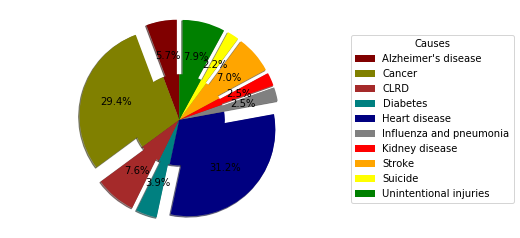

In [166]:
#Taking Cause_Name column for labels of pi chart (Removed all causes category)
labels = piData['Cause_Name'][1:].tolist()

#Taking Deaths column for percentages of pi chart (Removed all causes category)
sizes = piData['Deaths'][1:].tolist()

#Setting Colors
colors = ['Maroon', 'Olive', 'Brown', 'Teal', 'Navy', 'Grey', 'Red', 'Orange', 'Yellow', 'Green']
explode = (0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3)

#Setting Legend
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, title="Causes", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Plot
plt.pie( sizes, explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, radius=1.9, startangle=90)
plt.axis('equal')
plt.show()

It can clearly be seen that the top two causes of death count for over 60% of the deaths in the data.

Now, the mean of each diseases death rate for the years 1999 and 2016 are picked, calculated, and stored into comparable lists for use.

In [167]:
#Picking data and mean for each disease for 2016 (US States + DOC)
alData = df[(df.Year == 2016)&(df.Cause_Name=='Alzheimer\'s disease')&(df.State!='United States')]
alMean = alData['AADeath_Rate'].mean()
caData = df[(df.Year == 2016)&(df.Cause_Name=='Cancer')&(df.State!='United States')]
caMean = caData['AADeath_Rate'].mean()
clData = df[(df.Year == 2016)&(df.Cause_Name=='CLRD')&(df.State!='United States')]
clMean = clData['AADeath_Rate'].mean()
diData = df[(df.Year == 2016)&(df.Cause_Name=='Diabetes')&(df.State!='United States')]
diMean = diData['AADeath_Rate'].mean()
heData = df[(df.Year == 2016)&(df.Cause_Name=='Heart disease')&(df.State!='United States')]
heMean = heData['AADeath_Rate'].mean()
inData = df[(df.Year == 2016)&(df.Cause_Name=='Influenza and pneumonia')&(df.State!='United States')]
inMean = inData['AADeath_Rate'].mean()
kiData = df[(df.Year == 2016)&(df.Cause_Name=='Kidney disease')&(df.State!='United States')]
kiMean = kiData['AADeath_Rate'].mean()
stData = df[(df.Year == 2016)&(df.Cause_Name=='Stroke')&(df.State!='United States')]
stMean = stData['AADeath_Rate'].mean()
suData = df[(df.Year == 2016)&(df.Cause_Name=='Suicide')&(df.State!='United States')]
suMean = suData['AADeath_Rate'].mean()
unData = df[(df.Year == 2016)&(df.Cause_Name=='Unintentional injuries')&(df.State!='United States')]
unMean = unData['AADeath_Rate'].mean()
meanList = [alMean, caMean, clMean, diMean, heMean, inMean, kiMean, stMean, suMean, unMean]

#Picking data and mean for each disease for 1999 (US States + DOC)
alData1 = df[(df.Year == 1999)&(df.Cause_Name=='Alzheimer\'s disease')&(df.State!='United States')]
alMean1 = alData1['AADeath_Rate'].mean()
caData1 = df[(df.Year == 1999)&(df.Cause_Name=='Cancer')&(df.State!='United States')]
caMean1 = caData1['AADeath_Rate'].mean()
clData1 = df[(df.Year == 1999)&(df.Cause_Name=='CLRD')&(df.State!='United States')]
clMean1 = clData1['AADeath_Rate'].mean()
diData1 = df[(df.Year == 1999)&(df.Cause_Name=='Diabetes')&(df.State!='United States')]
diMean1 = diData1['AADeath_Rate'].mean()
heData1 = df[(df.Year == 1999)&(df.Cause_Name=='Heart disease')&(df.State!='United States')]
heMean1 = heData1['AADeath_Rate'].mean()
inData1 = df[(df.Year == 1999)&(df.Cause_Name=='Influenza and pneumonia')&(df.State!='United States')]
inMean1 = inData1['AADeath_Rate'].mean()
kiData1 = df[(df.Year == 1999)&(df.Cause_Name=='Kidney disease')&(df.State!='United States')]
kiMean1 = kiData1['AADeath_Rate'].mean()
stData1 = df[(df.Year == 1999)&(df.Cause_Name=='Stroke')&(df.State!='United States')]
stMean1 = stData1['AADeath_Rate'].mean()
suData1 = df[(df.Year == 1999)&(df.Cause_Name=='Suicide')&(df.State!='United States')]
suMean1 = suData1['AADeath_Rate'].mean()
unData1 = df[(df.Year == 1999)&(df.Cause_Name=='Unintentional injuries')&(df.State!='United States')]
unMean1 = unData1['AADeath_Rate'].mean()
meanList1 = [alMean1, caMean1, clMean1, diMean1, heMean1, inMean1, kiMean1, stMean1, suMean1, unMean1]

The means are now going to be plotted on a horizontal bar chart for easy comparison.

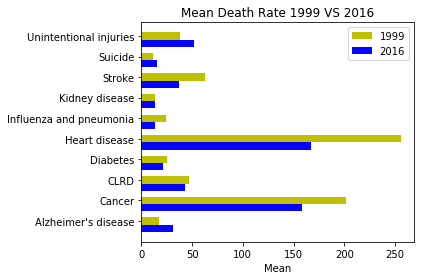

In [168]:
#Data to plot
n_groups = 10
means_2016 = meanList
means_1999 = meanList1
 
#Create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.99

#Create each bar
rects1 = plt.barh(index + bar_width, means_1999, bar_width,
                 alpha=opacity,
                 color='y',
                 label='1999')
rects2 = plt.barh(index, means_2016, bar_width,
                 alpha=opacity,
                 color='b',
                 label='2016')

#Finishing touches
plt.xlabel('Mean')
plt.title('Mean Death Rate 1999 VS 2016')
plt.yticks(index + bar_width, labels)
plt.legend()
plt.tight_layout()
plt.show()

As seen above there is decent contrast in mean between the years for mostly all causes especially Heart Disease.

Judging by the graph it seems as though total death rate for the top ten causes has gone down. Let's plot total death rate over the years to confirm.

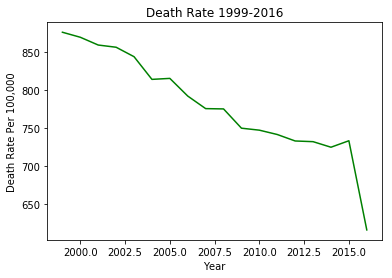

In [169]:
year = [i + 1 for i in range(1998,2016)]
dr = df[(df.Cause_Name == 'All causes')&(df.State=='United States')]
dr = dr['AADeath_Rate'].tolist()
dr = list(reversed(dr))
plt.plot(year, dr, color='g')
plt.xlabel('Year')
plt.ylabel('Death Rate Per 100,000')
plt.title('Death Rate 1999-2016')
plt.show()

As you can see, the death rate has definitely decreased over time.


To finish this section here are the basic stats of each cause for 2016.

In [170]:
stdList = [alData['AADeath_Rate'].std(), caData['AADeath_Rate'].std(), clData['AADeath_Rate'].std(), diData['AADeath_Rate'].std(), heData['AADeath_Rate'].std(), inData['AADeath_Rate'].std(), kiData['AADeath_Rate'].std(), stData['AADeath_Rate'].std(), suData['AADeath_Rate'].std(), unData['AADeath_Rate'].std()]
medList = [alData['AADeath_Rate'].median(), caData['AADeath_Rate'].median(), clData['AADeath_Rate'].median(), diData['AADeath_Rate'].median(), heData['AADeath_Rate'].median(), inData['AADeath_Rate'].median(), kiData['AADeath_Rate'].median(), stData['AADeath_Rate'].median(), suData['AADeath_Rate'].median(), unData['AADeath_Rate'].median()]
minList = [alData['AADeath_Rate'].min(), caData['AADeath_Rate'].min(), clData['AADeath_Rate'].min(), diData['AADeath_Rate'].min(), heData['AADeath_Rate'].min(), inData['AADeath_Rate'].min(), kiData['AADeath_Rate'].min(), stData['AADeath_Rate'].min(), suData['AADeath_Rate'].min(), unData['AADeath_Rate'].min()]
maxList = [alData['AADeath_Rate'].max(), caData['AADeath_Rate'].max(), clData['AADeath_Rate'].max(), diData['AADeath_Rate'].max(), heData['AADeath_Rate'].max(), inData['AADeath_Rate'].max(), kiData['AADeath_Rate'].max(), stData['AADeath_Rate'].max(), suData['AADeath_Rate'].max(), unData['AADeath_Rate'].max()]
stat = {'Cause': labels, 'Mean': meanList, 'Standard D.': stdList, 'Median': medList, 'Min': minList, 'Max': maxList}
statdf = pd.DataFrame(stat)
statdf

,Cause,Max,Mean,Median,Min,Standard D.
0,Alzheimer's disease,45.8,30.925490,31.7,13.1,8.483345
1,Cancer,193.8,158.150980,158.0,122.4,14.731468
2,CLRD,66.3,43.162745,43.5,17.7,10.460802
3,Diabetes,34.8,21.505882,20.5,14.9,4.221157
4,Heart disease,233.1,166.970588,159.2,114.9,28.707249
5,Influenza and pneumonia,24.4,13.729412,13.9,7.0,3.491893
6,Kidney disease,22.8,13.058824,12.4,3.7,4.457002
7,Stroke,51.6,37.162745,37.3,25.5,5.975884
8,Suicide,25.9,15.584314,14.9,5.2,4.695333
9,Unintentional injuries,89.7,52.366667,52.4,32.0,10.887050


#### Linear Regression
This dataset is not particularly the best for regression but I will try to make a sample work. In the bar chart above, it is seen that the suicide catagory has increased between 1999 and 2016. Let's build a model and try to predict the future. From 1999 to 2010 will be our training data, and the rest will be our test data.

In [149]:
suic = df[(df.Cause_Name == 'Suicide')&(df.State=='United States')]
train = suic[6:18]
train = list(train['Deaths'])
train = list(reversed(train))
train = np.array(train)
train=train.reshape(-1,1)
trainy = np.array([1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010])
trainy = trainy.reshape(-1,1) 
test = suic[0:6]
test = list(test['Deaths'])
test = list(reversed(test))
test = np.array(test)
test = test.reshape(-1,1)
testy = np.array([2011,2012,2013,2014,2015,2016])
testy = testy.reshape(-1,1)

In [154]:
reg = linear_model.LinearRegression()
reg.fit (trainy, train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [155]:
reg.coef_

array([[794.04895105]])

In [156]:
reg.intercept_

array([-1558621.78904429])

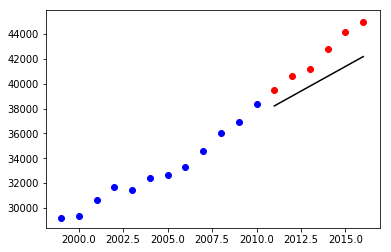

In [157]:
plt.clf()
plt.scatter(trainy, train, color="b", label="train data")
plt.scatter(testy, test, color="r", label="test data")
plt.plot(testy, reg.predict(testy), color="black")

Trying to predict 2011-2016 national suicide amounts did not work so well but hey, we tried.

A lot can be learned from this data. It is clear that the amount of deaths are decreasing by year for the United states but at the same time, as seen above, certain causes do not follow said trend. This data can be interpereted in many ways and for many purposes. For example, suicide deaths are increasing, but why? Can it be correlated (maybe causation) from things such as the internet? Is the reason for lower death amount from increases awareness of nutrition and exercise? In general it is possible explore each state by itself and compare trends to see what external factors are working for each cause of death (Increasing/decreasing).